## One dimensional classification problem

We have some input data $x\in \mathbb{R}$ with associated labels $t \in [0,1]$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [9]:
## =============== ##
## Define our data ##
## =============== ##
color_c0 = 'C0'
color_c1 = 'C1'

# input to our model. Represents time in seconds
x_data = np.array([0,1.5,2,2.5,3,4,5]).reshape(7,1)
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = np.array([0,0,0,0,1,1,1]).reshape(7,1)

## display
idx_class0 = t_data == 0
idx_class1 = t_data == 1
plt.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = 'data observations class 0')
plt.plot(x_data[idx_class1],t_data[idx_class1],'*', color = color_c1,markersize = 8, label = 'data observations class 1')
plt.xlabel('imagen')
plt.ylabel('clase asociada')
plt.legend()

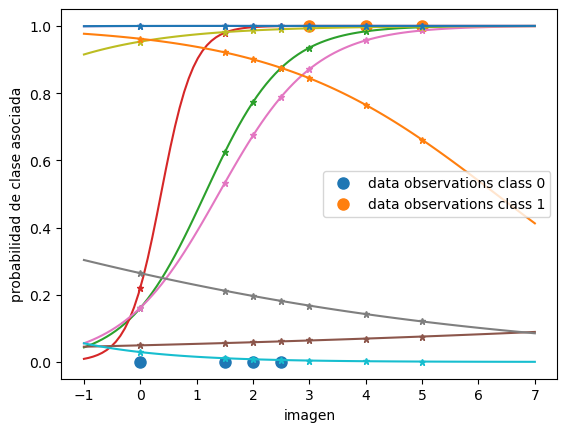

In [3]:
## ======================================================================= ##
## display possible functions depending on different values of $w$ and $b$ ##
## ======================================================================= ##

## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display
idx_class0 = t_data == 0
idx_class1 = t_data == 1
plt.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = 'data observations class 0')
plt.plot(x_data[idx_class1],t_data[idx_class1],'o', color = color_c1,markersize = 8, label = 'data observations class 1')
plt.xlabel('imagen')
plt.ylabel('probabilidad de clase asociada')
plt.legend()

## activation function sigmoid
def activation_function_sigmoid(x):
    return 1. / (1. + np.exp(-x))

## function that implements the computational graph
def computation_graph_linear(x,w,b):
    ''' This function represents a computational graph, a neural network, that implements a linear operation'''
    # this is the W^0 x from the theory above implemented using a transposition ;)
    y = activation_function_sigmoid(np.matmul(x,w) + b)
    return y

## function that implements the computational graph
def computation_graph_linear_just_weight(x,w):
    ''' This function represents a computational graph, a neural network, that implements a linear operation, with no weight'''
    # this is the W^0 x from the theory above implemented using a transposition ;)
    y = activation_function_sigmoid(np.matmul(x,w))
    return y

## function that initializes the values of a computational graph
def create_computation_graph_linear(n_in,n_out):
    ''' Create elements of the computational graph'''
    # parameters
    w = np.random.randn(n_in,n_out) + 1 # get a random value from standard normal distribution
    b = np.random.randn(n_out,)*5 # get a random value from Gaussian with mean 0 and standard deviation 5.

    return w,b

## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# neurons of output layer
n_out = 1

## ================================================================================
## Create several possible functions that our specific neural network can implement
for i in range(10):

    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-1,7, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w,b)

    if i == 0:
        plt.plot(x_data, y_pred,'*', markersize = 5, color = f"C{i+2}", label = 'Network predictions at training input data')
        plt.plot(x_range,y_range, color = f"C{i+2}", label = 'NeuralNet implemented function on all the domain' )
    else:
        plt.plot(x_data, y_pred,'*', markersize = 5,  color = f"C{i+2}")
        plt.plot(x_range,y_range, color = f"C{i+2}")
        #plt.ylim([-0.50,2])


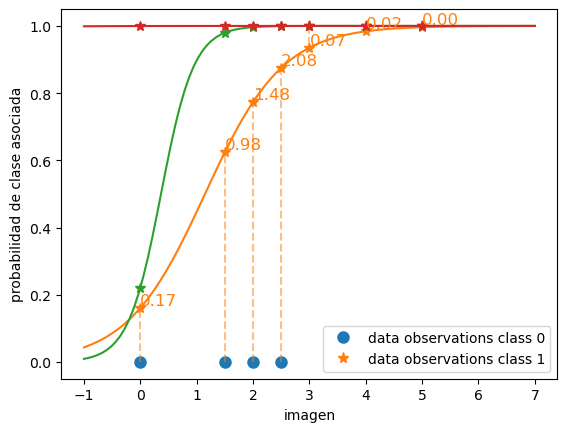

In [4]:
## ====================================== ##
## display loss of each possible function ##
## ====================================== ##
## Let's see the associated loss to each possible function and each prediction of this function at the training points.
## We show two different losses: brier score (top) and binary cross entropy loss ( bottom )

## decide which loss we plot
plot_brier = False

## function implementing brier score loss function (yeah it is like squared loss)
def brier_loss_function(y_pred,t):
    return (y_pred-t)**2

## function implementing binary cross entropy loss
def binary_cross_entropy_loss_function(y_pred,t):
    loss = np.zeros((len(y_pred),1))
    loss[t==1] = t[t==1]*np.log(y_pred[t==1])
    loss[t==0] = (1-t[t==0])*np.log(1-y_pred[t==0])
    return -1*loss

## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display
idx_class0 = t_data == 0
idx_class1 = t_data == 1
plt.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = 'data observations class 0')
plt.plot(x_data[idx_class1],t_data[idx_class1],'*', color = color_c1,markersize = 8, label = 'data observations class 1')
plt.xlabel('imagen')
plt.ylabel('probabilidad de clase asociada')
plt.legend()

## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# neurons of output layer
n_out = 1

## ================================================================================
## Create several possible functions that our specific neural network can implement
for i in range(3):

    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-1,7, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w,b)

    # compute the two losses at the predictions
    brier_loss = brier_loss_function(y_pred, t_data)
    bce_loss = binary_cross_entropy_loss_function(y_pred, t_data)


    if i == 0:
        plt.plot(x_data, y_pred,'*', markersize = 7, color = f"C{i+1}", label = 'Network predictions at training input data')
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'NeuralNet implemented function on all the domain' )
      
    else:
        plt.plot(x_data, y_pred,'*', markersize = 7,  color = f"C{i+1}")
        plt.plot(x_range,y_range, color = f"C{i+1}")

    if i in[0]:
        if plot_brier:
            ## plot brier loss associated at each point
            for xi, yi, sl in zip(x_data, y_pred, brier_loss):
                plt.text(xi, yi, f'{sl[0]:.2f}', fontsize=12, va='top', color = f"C{i+1}" ) 
        else:
            ## plot bce_loss    
            for xi, yi, sl in zip(x_data, y_pred, bce_loss):
                plt.text(xi, yi, f'{sl[0]:.2f}', fontsize=12, va='bottom', color = f"C{i+1}" ) 
        
        # draw line between dots to highliht what the loss measures
        for xi,t_d,y_p in zip(x_data,t_data,y_pred):
            plt.plot([xi,xi], [t_d, y_p], '--',color = f"C{i+1}", alpha = 0.5)


Text(0, 0.5, 'bce loss function')

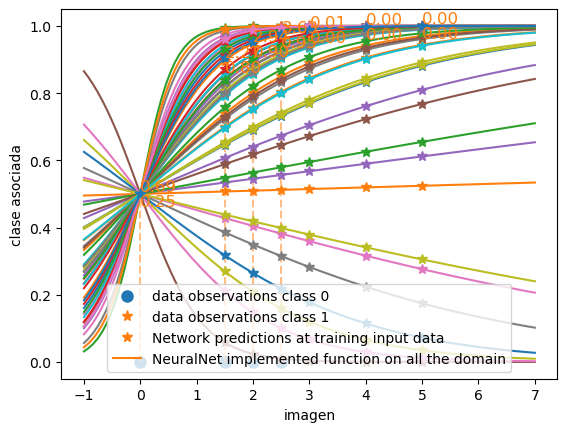

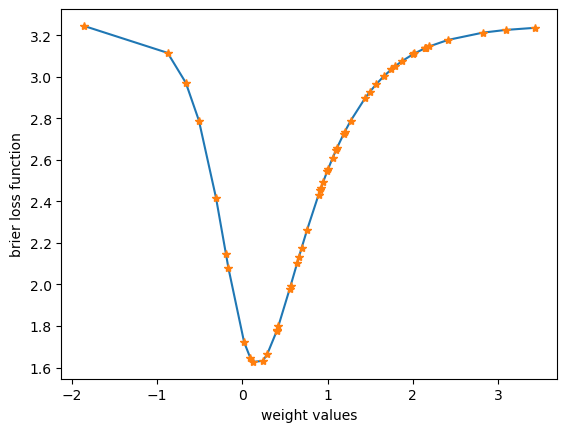

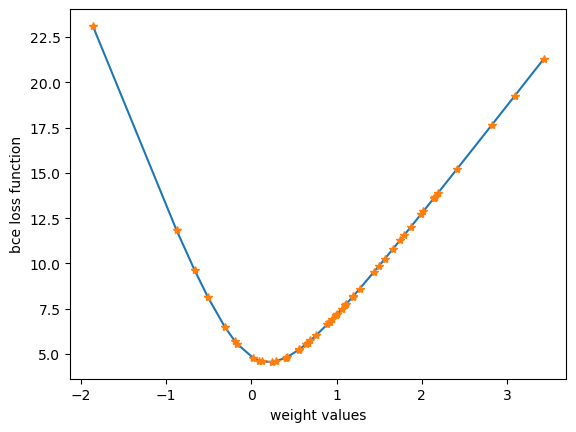

In [5]:
## ============================================================================== ##
## display loss as a function of weight parameter (loss incurred by each network) ##
## ============================================================================== ##
## Let's see the associated loss to each possible function but seeing the loss
## as a function of the weight parameter. To do so we fix the bias to 0.
## We show two different losses: brier (top) and log loss ( bottom )
## I repeat code from above but computing and plotting the loss.

## function implementing brier score loss function (yeah it is like squared loss)
def brier_loss_function(y_pred,t):
    return (y_pred-t)**2

## function implementing binary cross entropy loss
def binary_cross_entropy_loss_function(y_pred,t):
    loss = np.zeros((len(y_pred),1))
    loss[t==1] = t[t==1]*np.log(y_pred[t==1])
    loss[t==0] = (1-t[t==0])*np.log(1-y_pred[t==0])
    return -1*loss

## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display
idx_class0 = t_data == 0
idx_class1 = t_data == 1
plt.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = 'data observations class 0')
plt.plot(x_data[idx_class1],t_data[idx_class1],'*', color = color_c1,markersize = 8, label = 'data observations class 1')
plt.xlabel('imagen')
plt.ylabel('clase asociada')
plt.legend()

## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# neurons of output layer
n_out = 1

## ================================================================================
## Create several possible functions that our specific neural network can implement
brier_loss_acc = []
bce_loss_acc = []
w_acc = []
for i in range(50):

    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-1,7, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear_just_weight(x_range,w)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear_just_weight(x_data,w)

    # compute the two losses at the predictions
    brier_loss = brier_loss_function(y_pred, t_data)
    bce_loss = binary_cross_entropy_loss_function(y_pred, t_data)

    # acumulate loss and parameter used
    brier_loss_acc.append(np.sum(brier_loss))
    bce_loss_acc.append(np.sum(bce_loss))
    w_acc.append(np.squeeze(w))

    if i == 0:
        plt.plot(x_data, y_pred,'*', markersize = 7, color = f"C{i+1}", label = 'Network predictions at training input data')
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'NeuralNet implemented function on all the domain' )
      
    else:
        plt.plot(x_data, y_pred,'*', markersize = 7,  color = f"C{i+1}")
        plt.plot(x_range,y_range, color = f"C{i+1}")

    # plot loss associated to just first three lines to see it better.
    if i == 0:
        
        ## plot squared loss associated at each point
        for xi, yi, sl in zip(x_data,y_pred,brier_loss):
            plt.text(xi, yi, f'{sl[0]:.2f}', fontsize=12, va='top', color = f"C{i+1}" ) 
            
        ## plot absolute loss associated at each point
        for xi, yi, sl in zip(x_data,y_pred,bce_loss):
            plt.text(xi, yi, f'{sl[0]:.2f}', fontsize=12, va='bottom', color = f"C{i+1}" ) 
    
        # draw line between dots to highliht what the loss measures
        for xi,t_d,y_p in zip(x_data,t_data,y_pred):
            plt.plot([xi,xi], [t_d, y_p], '--',color = f"C{i+1}", alpha = 0.5)

plt.legend()

plt.figure()
# sort w_acc
idx = np.argsort(w_acc)

plt.plot(np.array(w_acc)[idx], np.array(brier_loss_acc)[idx])
plt.plot(np.array(w_acc)[idx], np.array(brier_loss_acc)[idx],'*')
plt.xlabel('weight values')
plt.ylabel('brier loss function')

plt.figure()
plt.plot(np.array(w_acc)[idx], np.array(bce_loss_acc)[idx])
plt.plot(np.array(w_acc)[idx], np.array(bce_loss_acc)[idx],'*')
plt.xlabel('weight values')
plt.ylabel('bce loss function')

## Two dimensional classification problem

We have some input data $x\in \mathbb{R}^2$ with associated labels $t \in [0,1]$

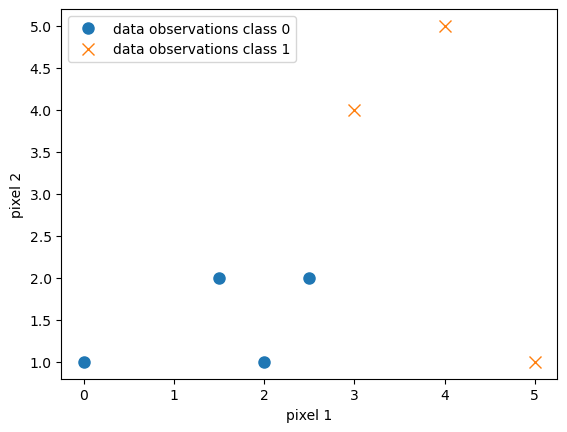

In [6]:
color_c0 = 'C0'
color_c1 = 'C1'

# input to our model. Represents time in seconds
x_data = np.array([
                    [0, 1],
                    [1.5, 2.0],
                    [2, 1],
                    [2.5, 2],
                    [3, 4],
                    [4, 5],
                    [5, 1],
                  ]
                 )
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = np.array([0,0,0,0,1,1,1]).reshape(7,1)

## display
idx_class0 = np.squeeze(t_data == 0)
idx_class1 = np.squeeze(t_data == 1)
plt.plot(x_data[idx_class0,0],x_data[idx_class0,1],'o', color = color_c0, markersize = 8, label = 'data observations class 0')
plt.plot(x_data[idx_class1,0],x_data[idx_class1,1],'x', color = color_c1,markersize = 8, label = 'data observations class 1')
plt.xlabel('pixel 1')
plt.ylabel('pixel 2')
plt.legend()

In [7]:
%matplotlib tk

In [10]:
## ======================================================================= ##
## display possible functions depending on different values of $w$ and $b$ ##
## ======================================================================= ##

## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## probability decision threshold
thr_prob = 0.5

## display
idx_class0 = np.squeeze(t_data == 0)
idx_class1 = np.squeeze(t_data == 1)
fig, (ax1,ax2) = plt.subplots(1,2)
ax2.set_xlim([-10,10])
ax2.set_ylim([-10,10])

## activation function sigmoid
def activation_function_sigmoid(x):
    return 1. / (1. + np.exp(-x))

## function that implements the computational graph
def computation_graph_linear(x,w,b):
    ''' This function represents a computational graph, a neural network, that implements a linear operation'''
    # this is the W^0 x from the theory above implemented using a transposition ;)
    y = activation_function_sigmoid(np.matmul(x,w) + b)
    return y

## function that implements the computational graph
def computation_graph_linear_just_weight(x,w):
    ''' This function represents a computational graph, a neural network, that implements a linear operation, with no weight'''
    # this is the W^0 x from the theory above implemented using a transposition ;)
    y = activation_function_sigmoid(np.matmul(x,w))
    return y

## function that initializes the values of a computational graph
def create_computation_graph_linear(n_in,n_out):
    ''' Create elements of the computational graph'''
    # parameters
    w = np.random.randn(n_in,n_out) + 1 # get a random value from standard normal distribution
    b = np.random.randn(n_out,)*5 # get a random value from Gaussian with mean 0 and standard deviation 5.

    return w,b

## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 2
# neurons of output layer
n_out = 1

# domain over where we want to plot the function implemented by the NNet.
# since input is 2D we need a mesh
x_range = np.linspace(-1,7, N_points_domain)
x1,x2 = np.meshgrid(x_range,x_range)

# reshape for neural network
x_range = np.hstack((np.reshape(x1, (N_points_domain**2,1)),np.reshape(x2, (N_points_domain**2,1))))

# allocate memory to plot decision thresholds
y_range_plot = np.zeros((N_points_domain,N_points_domain), np.float32)

## ================================================================================
## Create several possible functions that our specific neural network can implement
for i in range(25):
    
    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w,b)

    # reshape back to plotting
    y_range = np.reshape(y_range, (N_points_domain,N_points_domain))

    ## check classified as class 0 or class 1 by each model
    idx1 = np.squeeze(y_pred > thr_prob)
    idx0 = ~idx1

    # Clear previous data
    ax1.clear()  
    ax2.clear()

    # plot dataset
    ax1.plot(x_data[idx_class0,0],x_data[idx_class0,1],'o', color = color_c0, markersize = 15, label = 'data observations class 0')
    ax1.plot(x_data[idx_class1,0],x_data[idx_class1,1],'*', color = color_c1,markersize = 15, label = 'data observations class 1')
    ax1.set_xlabel('pixel 1')
    ax1.set_ylabel('pixel 2')

    ## plot prediction probability for class 1 and 0
    idx_range1 = y_range > thr_prob
    idx_range0 = ~idx_range1
    
    y_range_plot[idx_range1] = y_range[idx_range1]
    y_range_plot[idx_range0] = np.nan

    ax1.contourf(x1, x2, y_range_plot, levels = [0,0.25,0.5,0.75,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
    ax2.contourf(x1, x2, y_range_plot, levels = [0,0.25,0.5,0.75,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)

    y_range_plot[idx_range0] = y_range[idx_range0]
    y_range_plot[idx_range1] = np.nan

    ax1.contourf(x1, x2, y_range_plot, levels = [0,0.25,0.5,0.75,1], cmap = plt.cm.get_cmap("Blues"), alpha = 0.5)
    ax2.contourf(x1, x2, y_range_plot, levels = [0,0.25,0.5,0.75,1], cmap = plt.cm.get_cmap("Blues"), alpha = 0.5)
    
    # decision threshold
    ax1.contour(x1, x2, y_range, levels = [thr_prob], colors = ["k"])
    ax2.contour(x1, x2, y_range, levels = [thr_prob], colors = ["k"])
    
    # predictions
    ax2.plot(x_data[idx0,0],x_data[idx0,1], 'o', color = color_c0, markersize = 15, label = 'Network prediction towards class 0')
    ax2.plot(x_data[idx1,0],x_data[idx1,1], '*', color = color_c1, markersize = 15, label = 'Network prediction towards class 1')
    ax2.set_xlabel('pixel 1')
    ax2.set_ylabel('pixel 2')
    
    ## set legend
    ax1.legend()
    ax2.legend()
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(2)
    
plt.legend()

C:\Users\RAMON\AppData\Local\Temp\ipykernel_12456\3300178274.py:104: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax1.contourf(x1, x2, y_range_plot, levels = [0,0.25,0.5,0.75,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
C:\Users\RAMON\AppData\Local\Temp\ipykernel_12456\3300178274.py:105: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax2.contourf(x1, x2, y_range_plot, levels = [0,0.25,0.5,0.75,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
C:\Users\RAMON\AppData\Local\Temp\ipykernel_12456\3300178274.py:110: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use `